<a href="https://colab.research.google.com/github/thaicoh/Nhom2_HocMay_CNTT2/blob/main/NguyenThaiHoc_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd

# **1. Thu thập dữ liệu**

In [ ]:
df = pd.read_excel("/content/sample_data/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Thông tin thuộc tính và biến mục tiêu:

Tập dữ liệu bao gồm 8 thuộc tính (X1 …X8) và 2 biến mục tiêu (y1 và y2). Mục đính là sử dụng 8 thuộc tính để dự đoán 1 trong 2 đầu ra y1 và y2.

### Mô tả:

1. **X1:** Relative Compactness
2. **X2:** Surface Area
3. **X3:** Wall Area
4. **X4:** Roof Area
5. **X5:** Overall Height
6. **X6:** Orientation
7. **X7:** Glazing Area
8. **X8:** Glazing Area Distribution

- **y1:** Heating Load
- **y2:** Cooling Load


# **2. Làm sạch dữ liệu**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

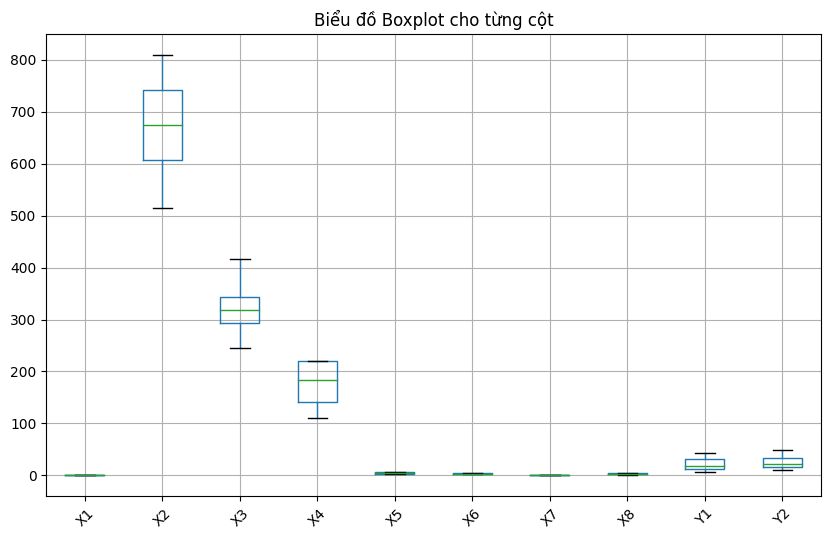

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ boxplot cho từng cột trong DataFrame
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Biểu đồ Boxplot cho từng cột')
plt.show()


# **3. Phân tích dữ liệu thăm dò (EDA)**

### **3.1 Thống kê mô tả:**

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### **3.2 Trực quan hóa dữ liệu**

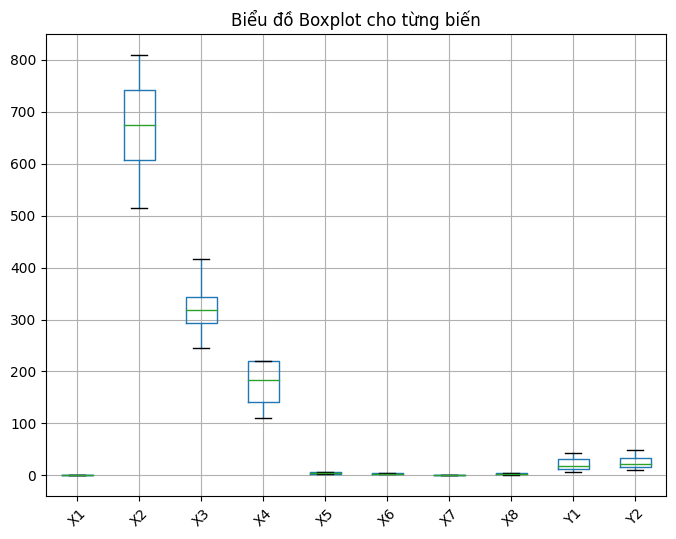

In [ ]:
# Biểu đồ boxplot cho từng biến
plt.figure(figsize=(8, 6))
df.boxplot()
plt.title('Biểu đồ Boxplot cho từng biến')
plt.xticks(rotation=45)
plt.show()

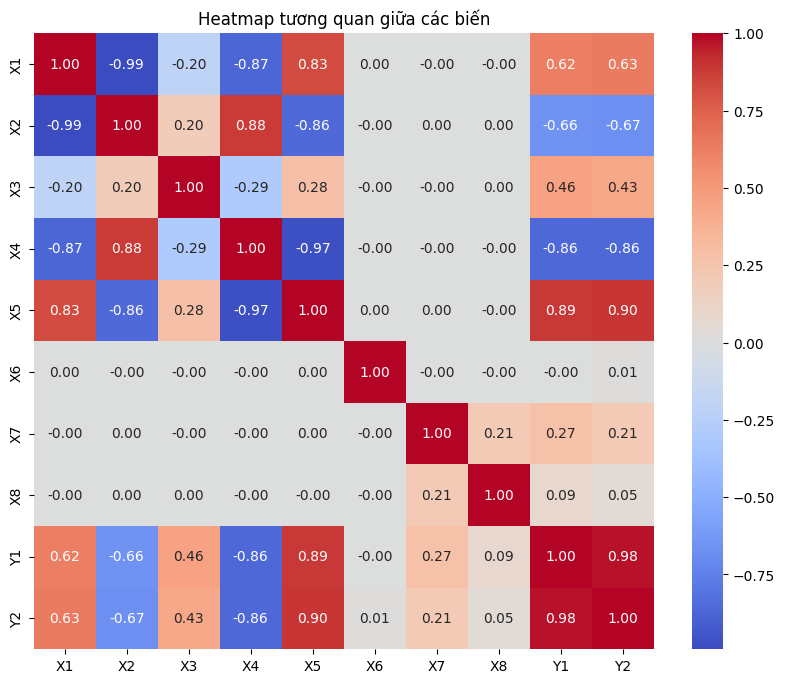

In [ ]:
# Tạo heatmap tương quan giữa các biến
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap tương quan giữa các biến')
plt.show()

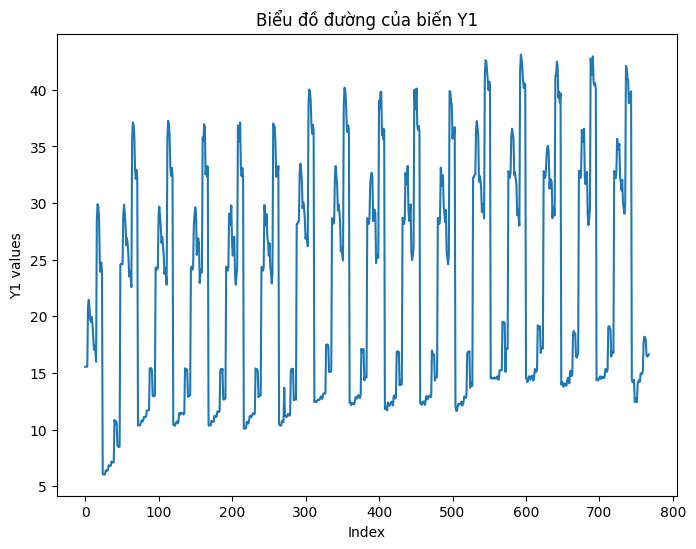

In [ ]:
# Biểu đồ đường cho biến Y1
plt.figure(figsize=(8, 6))
plt.plot(df['Y1'])
plt.xlabel('Index')
plt.ylabel('Y1 values')
plt.title('Biểu đồ đường của biến Y1')
plt.show()

# **4. Kỹ thuật tính năng**

### **4.1. Lựa chọn biến**
- Xác định các biến (đặc điểm) độc lập có khả năng ảnh hưởng đến tải sưởi ấm hoặc
làm mát.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Chia dữ liệu thành features và target
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = df['Y1']  # Target (biến mục tiêu, ví dụ Y1)

# Khởi tạo mô hình Random Forest Regressor
model = RandomForestRegressor()

# Huấn luyện mô hình trên dữ liệu
model.fit(X, y)

# Xác định độ quan trọng của các biến
feature_importance = model.feature_importances_

# Hiển thị độ quan trọng của các biến
for i, feature in enumerate(X.columns):
    print(f'{feature}: {feature_importance[i]}')


X1: 0.11040982109983989
X2: 0.3745718271144318
X3: 0.041913451942242
X4: 0.2945894956892139
X5: 0.08765280474165195
X6: 0.0007326338795750254
X7: 0.07652783703083563
X8: 0.013602128502209853


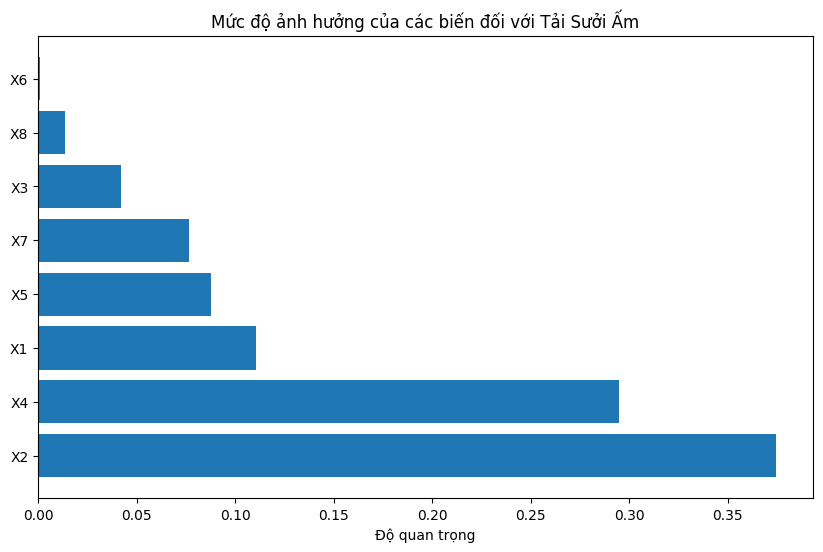

In [ ]:
# Sắp xếp độ quan trọng của các biến theo thứ tự giảm dần
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Vẽ biểu đồ cột cho mức độ quan trọng của từng biến
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Độ quan trọng')
plt.title('Mức độ ảnh hưởng của các biến đối với Tải Sưởi Ấm')
plt.show()


# **5. Xây dựng mô hình:**

### **5.1 Chuẩn bị dữ liệu:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = df['Y1']



In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo một StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong X
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)


            0         1         2         3    4         5         6         7
0    2.041777 -1.785875 -0.561951 -1.470077  1.0 -1.341641 -1.760447 -1.814575
1    2.041777 -1.785875 -0.561951 -1.470077  1.0 -0.447214 -1.760447 -1.814575
2    2.041777 -1.785875 -0.561951 -1.470077  1.0  0.447214 -1.760447 -1.814575
3    2.041777 -1.785875 -0.561951 -1.470077  1.0  1.341641 -1.760447 -1.814575
4    1.284979 -1.229239  0.000000 -1.198678  1.0 -1.341641 -1.760447 -1.814575
..        ...       ...       ...       ...  ...       ...       ...       ...
763 -1.174613  1.275625  0.561951  0.972512 -1.0  1.341641  1.244049  1.411336
764 -1.363812  1.553943  1.123903  0.972512 -1.0 -1.341641  1.244049  1.411336
765 -1.363812  1.553943  1.123903  0.972512 -1.0 -0.447214  1.244049  1.411336
766 -1.363812  1.553943  1.123903  0.972512 -1.0  0.447214  1.244049  1.411336
767 -1.363812  1.553943  1.123903  0.972512 -1.0  1.341641  1.244049  1.411336

[768 rows x 8 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **5.2 KNN Regressor**

### 5.2.1 Xây dựng mô hình KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.545595832611831


### 5.2.2 Đánh giá mô hình KNN

In [ ]:
# Tính toán các số liệu đánh giá
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Hiển thị các số liệu đánh giá
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 5.545595832611831
R-squared: 0.9467958586890471
Mean Absolute Error (MAE): 1.5010649350649345


### 5.2.3 Cải tiến mô hình KNN

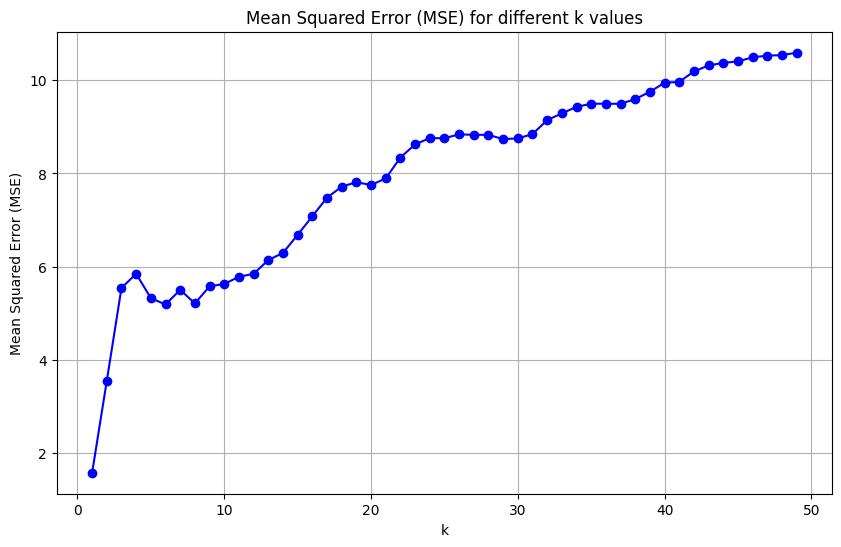

In [ ]:
import matplotlib.pyplot as plt

# Khởi tạo list để lưu MSE với các giá trị k tương ứng
mse_values = []

for k in range(1, 50):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error (MSE) for different k values')
plt.xlabel('k')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()



In [ ]:
# Tìm vị trí của giá trị MSE nhỏ nhất
best_mse_index = mse_values.index(min(mse_values))

# Giá trị tốt nhất của MSE
best_mse = min(mse_values)

# Giá trị k tương ứng với MSE tốt nhất
best_k = best_mse_index + 1  # vị trí index bắt đầu từ 0, nên cần +1

print(f"Best MSE: {best_mse} with k={best_k}")


Best MSE: 1.5834708831168829 with k=1


In [ ]:
# Xây dựng lại model với k vừa tìm được
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.5834708831168829


## **5.3  Regression Tree**

### 5.3.1 Xây dựng mô hình regression tree

In [ ]:
# Define the regression tree model
regression_tree = DecisionTreeRegressor(max_depth=3)
regression_tree.fit(X_train, y_train)
y_pred2 = regression_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.858667140484365


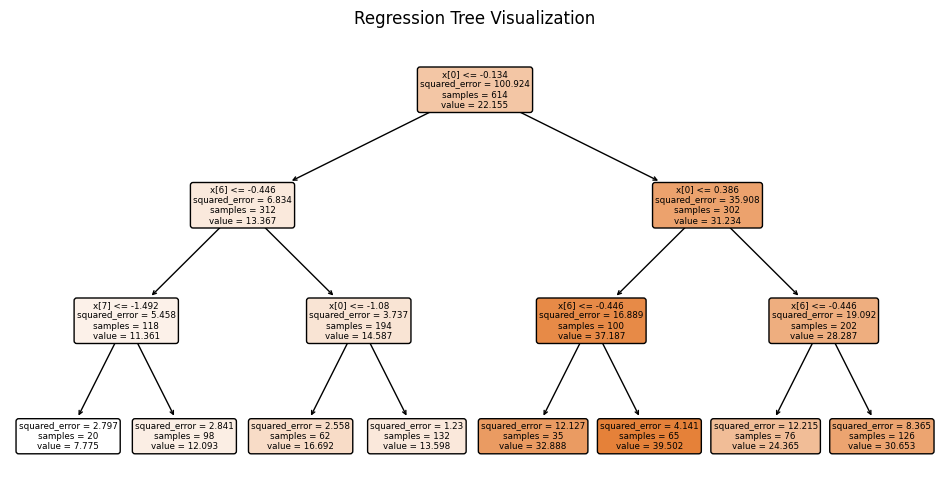

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(regression_tree, filled=True, rounded=True)
plt.title("Regression Tree Visualization")
plt.show()

### 5.3.1 Đánh giá mô hình regression tree

In [ ]:
# Tính toán các số liệu đánh giá
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse2 = mean_squared_error(y_test, y_pred2)
r_squared2 = r2_score(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)

# Hiển thị các số liệu đánh giá
print(f"Mean Squared Error (MSE): {mse2}")
print(f"R-squared: {r_squared2}")
print(f"Mean Absolute Error (MAE): {mae2}")

Mean Squared Error (MSE): 6.858667140484365
R-squared: 0.9341983248037647
Mean Absolute Error (MAE): 2.007357965406561


### 5.3.3 Cải tiến mô hình regression tree

Best MSE: 0.3103242160931472 with max_depth=7


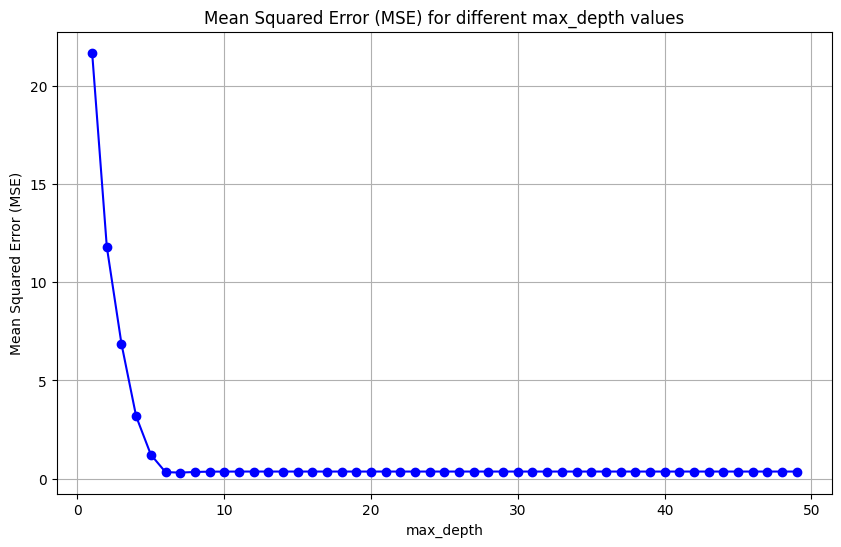

In [ ]:
import matplotlib.pyplot as plt

best_mse = float('inf')  # Khởi tạo MSE tốt nhất ban đầu là vô cực
best_depth = 0  # Lưu giá trị tối ưu cho max_depth
mse_values = []  # List lưu trữ các giá trị MSE tương ứng với max_depth

for depth in range(1, 50):  # Thử các giá trị từ 1 đến 50 cho max_depth
    regression_tree = DecisionTreeRegressor(max_depth=depth)
    regression_tree.fit(X_train, y_train)
    y_pred = regression_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    # Lưu lại thông số tốt nhất cho MSE và max_depth
    if mse < best_mse:
        best_mse = mse
        best_depth = depth


# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), mse_values, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error (MSE) for different max_depth values')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()




In [ ]:
print(f"Best MSE: {best_mse} with max_depth={best_depth}")


Best MSE: 0.3103242160931472 with max_depth=7


In [ ]:
# Xây dựng lại mô hình với max_depth vừa mới tìm được
regression_tree = DecisionTreeRegressor(max_depth=7)
regression_tree.fit(X_train, y_train)
y_pred2 = regression_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.31032421609314664


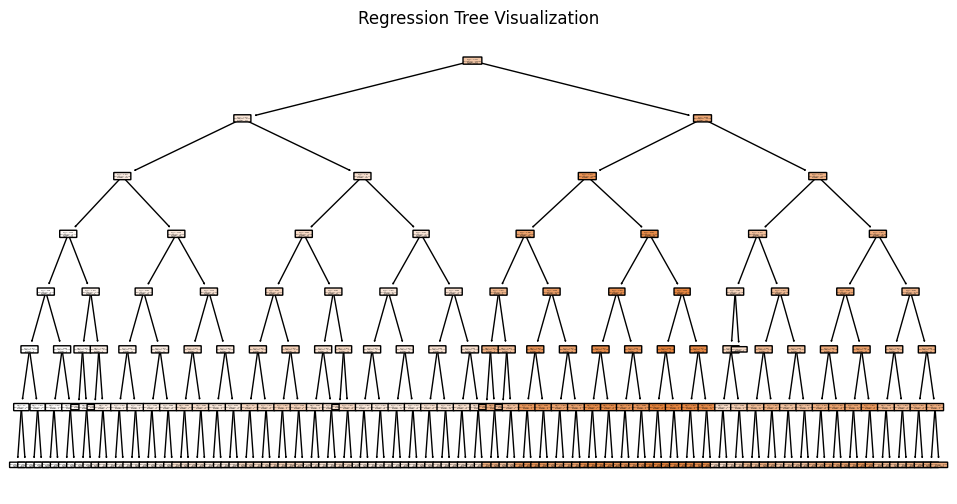

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 6))
plot_tree(regression_tree, filled=True, rounded=True)
plt.title("Regression Tree Visualization")
plt.show()

# **6. Kiểm tra**

In [ ]:
df_newData = pd.read_excel("/content/sample_data/testData.xlsx")

In [ ]:
df_newData.columns = df.columns
df_newData

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.90,563.5,318.5,122.5,7.0,3,0.1,1,29.87,29.87
1,0.90,563.5,318.5,122.5,7.0,4,0.1,1,29.14,29.58
2,0.90,563.5,318.5,122.5,7.0,5,0.1,1,28.09,34.33
3,0.86,588.0,294.0,147.0,7.0,2,0.1,1,26.28,30.89
4,0.86,588.0,294.0,147.0,7.0,3,0.1,1,26.91,25.60
5,0.86,588.0,294.0,147.0,7.0,4,0.1,1,26.37,27.03
6,0.86,588.0,294.0,147.0,7.0,5,0.1,1,25.27,31.73
7,0.82,612.5,318.5,147.0,7.0,2,0.1,1,23.53,27.31
8,0.82,612.5,318.5,147.0,7.0,3,0.1,1,24.03,24.91
9,0.82,612.5,318.5,147.0,7.0,4,0.1,1,23.54,24.61


In [ ]:
df_newData=df_newData.drop(columns="Y2") #Xóa cột Y2

In [ ]:
y_newData = df_newData['Y1']
X_newData = df_newData.drop(columns="Y1")

In [ ]:
# Chuẩn hóa dữ liệu trong X
X_newData_scaled = scaler.fit_transform(X_newData)
X_newData_scaled = pd.DataFrame(X_newData_scaled)

In [ ]:
X_newData_scaled

,0,1,2,3,4,5,6,7
0,1.766904,-1.595448,0.069296,-1.024642,0.648886,-0.505076,-1.387779e-17,0.0
1,1.766904,-1.595448,0.069296,-1.024642,0.648886,0.404061,-1.387779e-17,0.0
2,1.766904,-1.595448,0.069296,-1.024642,0.648886,1.313198,-1.387779e-17,0.0
3,1.104315,-1.082625,-0.398451,-0.395884,0.648886,-1.414214,-1.387779e-17,0.0
4,1.104315,-1.082625,-0.398451,-0.395884,0.648886,-0.505076,-1.387779e-17,0.0
5,1.104315,-1.082625,-0.398451,-0.395884,0.648886,0.404061,-1.387779e-17,0.0
6,1.104315,-1.082625,-0.398451,-0.395884,0.648886,1.313198,-1.387779e-17,0.0
7,0.441726,-0.569803,0.069296,-0.395884,0.648886,-1.414214,-1.387779e-17,0.0
8,0.441726,-0.569803,0.069296,-0.395884,0.648886,-0.505076,-1.387779e-17,0.0
9,0.441726,-0.569803,0.069296,-0.395884,0.648886,0.404061,-1.387779e-17,0.0


In [ ]:

new_predictions = knn_regressor.predict(X_newData_scaled)
new_predictions2 = regression_tree.predict(X_newData_scaled)

print("Dự đoán của KNN đối với new data:")
print(new_predictions)
print("")
print("")
print("Dự đoán của regression tree đối với new data:")
print(new_predictions2)

Dự đoán của KNN đối với new data:
[32.4  32.68 32.29 28.4  29.4  29.27 29.07 25.74 25.48 25.37 25.17 39.04
 38.35 39.81 39.83 36.95 36.28 35.64 36.52 12.41 12.28 12.1  12.19 12.34
 12.46 12.31 12.12]


Dự đoán của regression tree đối với new data:
[32.41928571 32.41928571 32.41928571 29.27333333 29.27333333 29.27333333
 29.27333333 25.7        25.399      25.399      25.399      36.955
 36.461      36.461      36.461      12.282      12.282      12.282
 12.282      12.89363636 12.89363636 12.89363636 12.89363636 16.779
 16.779      16.779      16.779     ]


# **8. Lập tài liệu:**

### 8.1. Giải thích mẫu:

### Thông tin thuộc tính và biến mục tiêu:

Tập dữ liệu bao gồm 8 thuộc tính (X1 …X8) và 2 biến mục tiêu (y1 và y2). Mục đính là sử dụng 8 thuộc tính để dự đoán 1 trong 2 đầu ra y1 và y2.

### Mô tả:

1. **X1:** Relative Compactness
2. **X2:** Surface Area
3. **X3:** Wall Area
4. **X4:** Roof Area
5. **X5:** Overall Height
6. **X6:** Orientation
7. **X7:** Glazing Area
8. **X8:** Glazing Area Distribution

- **y1:** Heating Load
- **y2:** Cooling Load


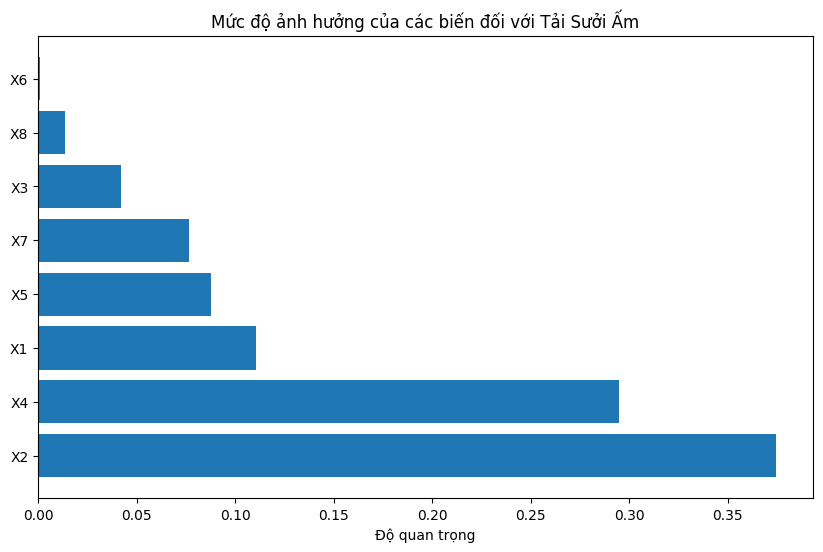

In [ ]:
# Sắp xếp độ quan trọng của các biến theo thứ tự giảm dần
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Vẽ biểu đồ cột cho mức độ quan trọng của từng biến
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Độ quan trọng')
plt.title('Mức độ ảnh hưởng của các biến đối với Tải Sưởi Ấm')
plt.show()